In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
from tensorflow import keras

In [3]:
import numpy as np

In [4]:
import random

In [5]:
#prepare data
#f(x)= x**3 + x**2 - x - 1
X = tf.placeholder(tf.float32)
Y = X**3+X**2-X-1

train_x = list(np.arange(-100,100,3.8763))
random.shuffle(train_x)

with tf.Session() as sess:
    train_y = sess.run(Y, {X:train_x})
    print(train_x,train_y)

[74.43350000000004, 4.660100000000014, -84.4948, -26.35029999999999, 97.69130000000001, -65.1133, -10.845099999999988, -88.3711, 78.30980000000002, 86.06240000000003, 58.928300000000036, 8.536400000000015, -30.22659999999999, 39.54680000000002, -18.59769999999999, 62.80460000000002, -100.0, -14.721399999999988, -92.2474, 70.55720000000002, 27.917900000000017, 31.794200000000018, 55.05200000000002, -45.73179999999999, -80.6185, 82.18610000000001, -34.10289999999999, 43.423100000000034, 16.289000000000016, 35.670500000000004, -61.236999999999995, 0.7838000000000136, -22.47399999999999, -49.60809999999999, 66.68090000000001, -57.360699999999994, 47.29940000000002, -37.97919999999999, 20.165300000000016, 12.412700000000015, 51.175700000000006, -72.8659, -53.484399999999994, -68.9896, -76.7422, 24.041600000000017, -3.092499999999987, 93.81500000000003, -6.9687999999999874, -96.1237, 89.93870000000004, -41.85549999999999] [ 4.17852281e+05  1.17257645e+02 -5.96016812e+05 -1.75763340e+04
  9.4

In [6]:
import matplotlib.pyplot as plt

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               200       
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_9 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________
52/52 [==============================] - 0s 1ms/sample - loss: 84218820765.5385


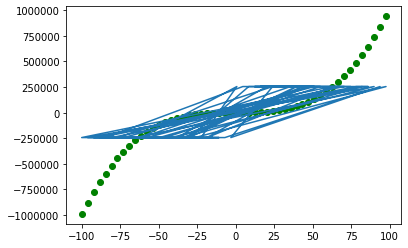

In [20]:
#keras
def build_model():
        model = keras.Sequential()
        model.add(keras.layers.Dense(100, input_shape=(1,)))
        model.add(keras.layers.Activation('sigmoid'))
        model.add(keras.layers.Dense(100))
        model.add(keras.layers.Activation('sigmoid'))
        model.add(keras.layers.Dense(1))
        model.summary()
        return model

    
model = build_model()
model.compile(loss='mean_squared_error',optimizer="sgd")
model.fit([train_x], [train_y], epochs=3000, verbose=0)
score = model.evaluate([train_x],[train_y])

plt.scatter(train_x, train_y,color='green')
plt.plot(train_x, model.predict([train_x]))

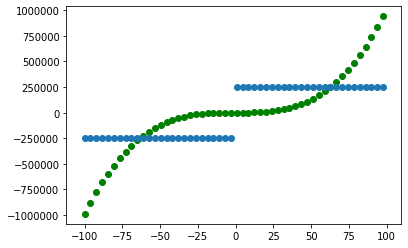

In [21]:
plt.scatter(train_x, train_y,color='green')
plt.scatter(train_x, model.predict([train_x]))

In [9]:
#now build NN


layer = [1,128,256,1]

weights = {
    'w1': tf.Variable(tf.random_normal([layer[0],layer[1]])),
    'w2': tf.Variable(tf.random_normal([layer[1],layer[2]])),
    'out': tf.Variable(tf.random_normal([layer[2],layer[3]]))
}
bias = {
    'b1': tf.Variable(tf.random_normal([layer[1]])),
    'b2': tf.Variable(tf.random_normal([layer[2]])),
    'out': tf.Variable(tf.random_normal([layer[3]]))
}

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(weights['w1'])
    print(sess.run(bias['out']))
    #print(sess.run(weights['w1']))

<tf.Variable 'Variable:0' shape=(1, 128) dtype=float32_ref>
[-0.71810985]


In [10]:
def nnet(x):
    layer1 = tf.add(tf.matmul)